In [93]:
import json
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import sqlite3
import nltk
import spacy
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import umap
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,log_loss, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import itertools
%matplotlib inline

In [94]:
df_food = pd.read_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/df_food_clean_rev.csv')

In [95]:
df_food['stars'].replace(3,np.nan, inplace =True)
df_food.dropna(inplace=True)
df_food['star_binary'] = np.where(df_food['stars'] <3, 'no', 'yes')


In [96]:
df_food['star_binary'].value_counts().index

Index(['yes', 'no'], dtype='object')

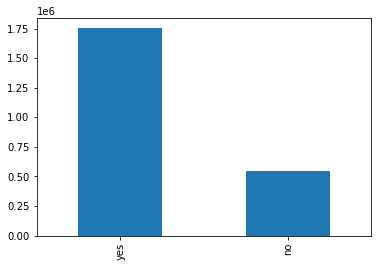

In [97]:
df_food['star_binary'].value_counts().plot.bar()

In [98]:
df_food['state_star'] = df_food['state'] + df_food['star_binary']


In [99]:
df_food_v2 = df_food.reset_index(drop=True).drop('Unnamed: 0', axis = 1)

In [100]:
df_food_clean = df_food_v2.copy()

In [101]:
#df_food_clean = df_food_v2.loc[df_food_v2['state_star'].str.contains('yes')].reset_index(drop=True)


In [102]:
vectorizer = CountVectorizer(analyzer='word', min_df=200, max_features=50)
Xvec = vectorizer.fit_transform(df_food_clean['food_comb'])
bow_df = pd.DataFrame(Xvec.toarray(), columns=vectorizer.get_feature_names())

In [103]:
word_count_table = pd.concat([bow_df, df_food_clean['state']], axis = 1).set_index('state')

In [104]:
word_count_table.columns

Index(['american', 'asianfusion', 'bakeries', 'barbeque', 'breakfast',
       'brunch', 'buffets', 'burgers', 'cafes', 'chickenwings', 'chinese',
       'coffee', 'comfortfood', 'delis', 'desserts', 'diners', 'fastfood',
       'french', 'frozenyogurt', 'gastropubs', 'icecream', 'indian', 'italian',
       'japanese', 'juicebars', 'korean', 'mediterranean', 'mexican', 'new',
       'noodles', 'pizza', 'restaurant', 'salad', 'sandwiches', 'seafood',
       'smallplates', 'smoothies', 'soup', 'southern', 'specialtyfood',
       'steakhouses', 'sushibars', 'tacos', 'tapas', 'tea', 'thai',
       'traditional', 'vegan', 'vegetarian', 'vietnamese'],
      dtype='object')

In [105]:
word_count_table.groupby('state').mean()

,american,asianfusion,bakeries,barbeque,breakfast,brunch,buffets,burgers,cafes,chickenwings,...,steakhouses,sushibars,tacos,tapas,tea,thai,traditional,vegan,vegetarian,vietnamese
state,,,,,,,,,,,,,,,,,,,,,
AZ,0.389902,0.052072,0.036010,0.047468,0.197269,0.197269,0.016253,0.110699,0.061089,0.038577,...,0.046035,0.051468,0.031094,0.011694,0.112930,0.027932,0.198439,0.034279,0.044214,0.019884
NC,0.408258,0.062592,0.034514,0.060412,0.164774,0.164774,0.007417,0.098844,0.039963,0.062793,...,0.051384,0.061330,0.014828,0.032816,0.075521,0.022875,0.219995,0.019612,0.038994,0.024872
NV,0.366207,0.077740,0.034398,0.054786,0.203114,0.203114,0.049833,0.104097,0.051880,0.030407,...,0.078282,0.072522,0.018288,0.024876,0.078580,0.028885,0.185572,0.041900,0.028306,0.017324
OH,0.445273,0.032438,0.035113,0.041194,0.133366,0.133366,0.014623,0.098954,0.038743,0.033202,...,0.053318,0.040295,0.028331,0.015021,0.067774,0.025003,0.225562,0.026786,0.032948,0.011630
ON,0.100051,0.072564,0.036859,0.038343,0.105846,0.105846,0.014252,0.057912,0.068128,0.020198,...,0.029681,0.071624,0.000070,0.029149,0.097757,0.047264,0.067358,0.026855,0.030936,0.033389
PA,0.455616,0.027133,0.033079,0.028411,0.144621,0.144621,0.007122,0.085216,0.053742,0.037206,...,0.046079,0.045804,0.027304,0.008684,0.093110,0.040450,0.212882,0.026875,0.033791,0.008830
QC,0.085385,0.030652,0.050421,0.034192,0.179686,0.179686,0.004764,0.079208,0.120611,0.004880,...,0.040922,0.033026,0.000321,0.026310,0.101833,0.014860,0.042292,0.040791,0.037310,0.023368


In [106]:
pd.DataFrame(pd.DataFrame(word_count_table.groupby('state').sum().sum().sort_values(ascending = True)).index)

,0
0,indian
1,icecream
2,frozenyogurt
3,french
4,comfortfood
5,southern
6,vietnamese
7,delis
8,tacos
9,smallplates


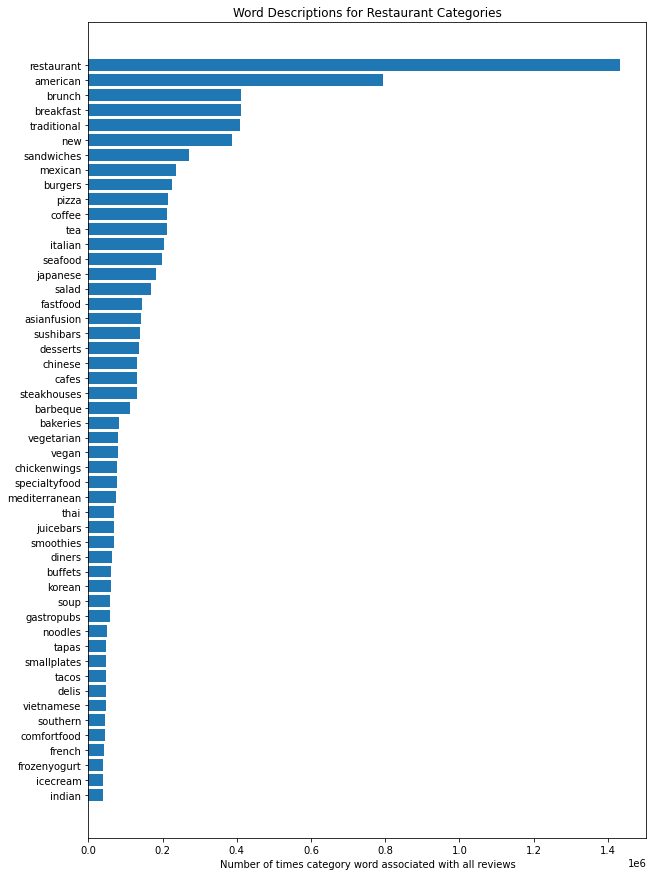

In [107]:
plt.figure(figsize = (10, 15))
plt.barh(y = pd.DataFrame(word_count_table.groupby('state').sum().sum().sort_values(ascending = True)).index, width = pd.DataFrame(word_count_table.groupby('state').sum().sum().sort_values(ascending = True))[0])
plt.xlabel('Number of times category word associated with all reviews')
plt.title('Word Descriptions for Restaurant Categories')
plt.show()

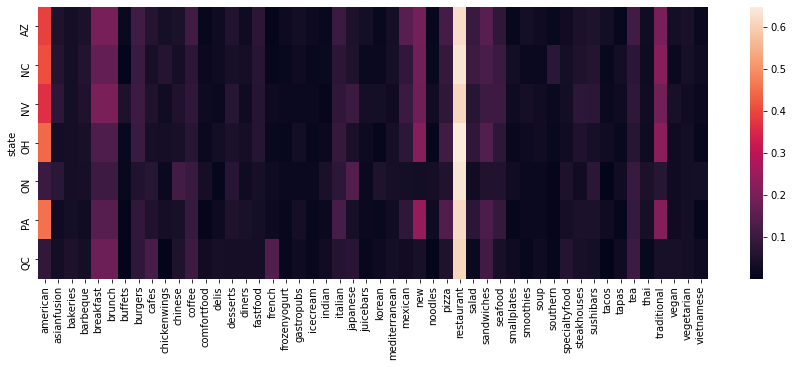

In [108]:
plt.figure(figsize = (15,5))
sns.heatmap(word_count_table.groupby('state').mean())

In [109]:
vectorizertf = TfidfVectorizer(analyzer='word', min_df=50, max_features=50)
Xvectf = vectorizertf.fit_transform(df_food_clean['food_comb'])
tf_df = pd.DataFrame(Xvectf.toarray(), columns=vectorizertf.get_feature_names())

In [110]:
state_dummies = pd.get_dummies(df_food_clean['state'], drop_first = True)

In [111]:
#df_vec = bow_df

In [112]:
df_vec = tf_df

In [113]:
#df_vec = np.array(df_food_clean['stars_avg']).reshape(-1, 1)

In [114]:
X = df_vec
y = df_food_clean['star_binary']

In [115]:
X

,american,asianfusion,bakeries,barbeque,breakfast,brunch,buffets,burgers,cafes,chickenwings,...,steakhouses,sushibars,tacos,tapas,tea,thai,traditional,vegan,vegetarian,vietnamese
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.65025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297212,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297213,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297214,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297215,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# X = df_vec[best_features]
# y = df_food_clean['state']

In [117]:

# df_umap = X[(X != 0).any(axis=1)]
# df_umap = X.loc[:, (X != 0).any(axis=0)]
# df_umap

In [118]:
# up = umap.UMAP(n_neighbors = 20, min_dist = .8, metric = 'euclidean')
# Xumap = up.fit_transform(X)
# sns.scatterplot(Xumap[:, 0], Xumap[:, 1], hue = df_food_clean['star_binary'], s= 10)

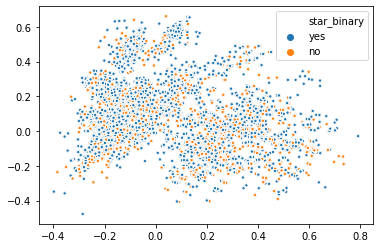

In [119]:
pca = PCA()
Xpca = pca.fit_transform(X)
sns.scatterplot(Xpca[:, 0], Xpca[:, 1], hue = df_food_clean['star_binary'], s= 10)

In [122]:
le_train = LabelEncoder()
y_le = le_train.fit_transform(y)

In [123]:
y_export = pd.Series(y_le)
X.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/C4_rev_pos_X.csv')
y.to_csv('/Users/robholmstrom/OneDrive/Gitrepos/nonrepo_files/capstone4_files/C4_rev_pos_y.csv')

In [124]:
y.value_counts()

yes    1751333
no      545884
Name: star_binary, dtype: int64

In [125]:
y_state_dict= pd.concat([pd.DataFrame(y_le), pd.DataFrame(y)], axis = 1).groupby('star_binary')[0].mean()

In [126]:
y_state_dict_swap = {value:key for key, value in y_state_dict.items()}


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y_le, stratify = y_le, random_state = 42)

In [128]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
X_test_rus, y_test_rus = rus.fit_sample(X_test, y_test)


In [129]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test_rus)

In [130]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class= 'ovr', solver = 'lbfgs', penalty = 'l2', max_iter = 1000)
lr.fit(X_train_scaled, y_train_rus)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [131]:
y_test_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [152]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=None):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
   

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="grey" if cm[i, j] > thresh else "black", fontsize=20)
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="grey" if cm[i, j] > thresh else "black",fontsize=20)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [133]:

print('LR1 confusion matrix')
#lr1train = confusion_matrix(y_train, y_pred_train, normalize= None)
lr1test = confusion_matrix(y_test_rus, y_test_pred, normalize = None)
test = pd.DataFrame(lr1test).rename(columns = y_state_dict_swap, index = y_state_dict_swap)

LR1 confusion matrix


In [134]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_pred, average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_pred, average = 'macro'))

Test macro average recall score is  0.5821859589216757
Train macro average recall score is  0.5807619689653235


In [135]:
print('Test accuracy score is ',accuracy_score(y_test_rus, y_test_pred))
print('Train accuracy score is ',accuracy_score(y_train_rus, y_train_pred))

Test accuracy score is  0.5821859589216757
Train accuracy score is  0.5807619689653235


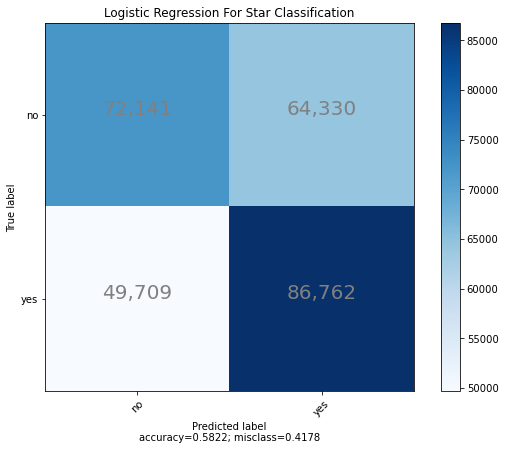

In [153]:
labels = list(y_state_dict_swap.values())
target_names = labels 
plot_confusion_matrix(lr1test,
                          target_names,
                          title='Logistic Regression For Star Classification',
                          cmap=None,
                          normalize=None)

In [137]:
recall_score(y_test_rus, y_test_pred, average = 'macro')/(1/lr1test.shape[0])

1.1643719178433514

In [138]:
# knn1 = KNeighborsClassifier(n_neighbors=15, weights='uniform', leaf_size=20)
# knn1.fit(X_train_scaled, y_train_rus)

# y_test_predknn1 = knn1.predict(X_test_scaled)
# y_train_predknn1 = knn1.predict(X_train_scaled)
# print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predknn1,average = 'macro'))
# print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predknn1,average = 'macro'))

In [139]:
# print('Test accuracy score is ',accuracy_score(y_test_rus, y_test_predknn1))
# print('Train accuracy score is ',accuracy_score(y_train_rus, y_train_predknn1))

In [140]:
# knntest = confusion_matrix(y_test_rus, y_test_pred, normalize = None)
# pd.DataFrame(knntest).rename(columns = y_state_dict_swap)

In [141]:
# labels = list(y_state_dict_swap.values())
# target_names = labels 
# plot_confusion_matrix(knntest,
#                           target_names,
#                           title='Confusion matrix',
#                           cmap=None,
#                           normalize=None)

In [142]:
rf = RandomForestClassifier(max_depth = 8)
rf.fit(X_train_scaled, y_train_rus)
y_test_predrf = rf.predict(X_test_scaled)
y_train_predrf = rf.predict(X_train_scaled)



In [143]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predrf,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predrf,average = 'macro'))

Test macro average recall score is  0.5947197573110771
Train macro average recall score is  0.5940419576320244


In [144]:
rftest = confusion_matrix(y_test_rus, y_test_predrf, normalize = None)
dfrf = pd.DataFrame(rftest).rename(columns = y_state_dict_swap)

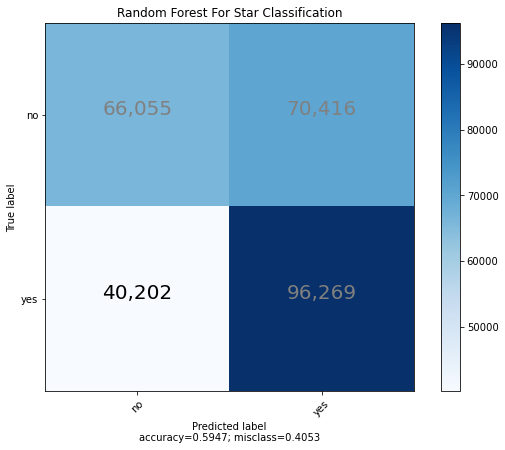

In [154]:
labels = list(y_state_dict_swap.values())
target_names = labels 
plot_confusion_matrix(rftest,
                          target_names,
                          title='Random Forest For Star Classification',
                          cmap=None,
                          normalize=None)

In [146]:
recall_score(y_test_rus, y_test_predrf, average = 'macro')/(1/rftest.shape[0])

1.1894395146221541

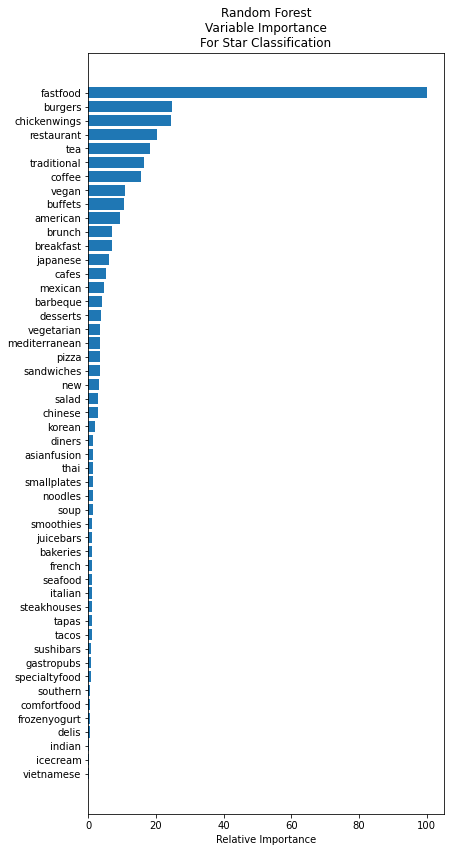

In [156]:
feature_importance = rf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize = (14,14))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest\nVariable Importance\nFor Star Classification')
plt.show()

In [147]:

params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'deviance', 
          'learning_rate':0.08, 
          'subsample':.62, 
          'min_samples_split':.02}

# Initialize and fit the model.
gbc = GradientBoostingClassifier(**params)
gbc.fit(X_train_scaled, y_train_rus)

y_test_predgb = gbc.predict(X_test_scaled)
y_train_predgb = gbc.predict(X_train_scaled)

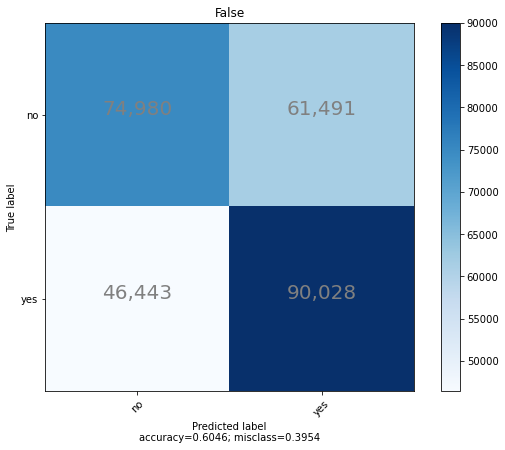

In [155]:
gbtest = confusion_matrix(y_test_rus, y_test_predgb)
plot_confusion_matrix(gbtest,target_names,False)

In [149]:
recall_score(y_test_rus, y_test_predgb, average = 'macro')/(1/gbtest.shape[0])

1.209106696660829

In [150]:
print('Test macro average recall score is ',recall_score(y_test_rus, y_test_predgb,average = 'macro'))
print('Train macro average recall score is ',recall_score(y_train_rus, y_train_predgb,average = 'macro'))

Test macro average recall score is  0.6045533483304145
Train macro average recall score is  0.6042419268562551


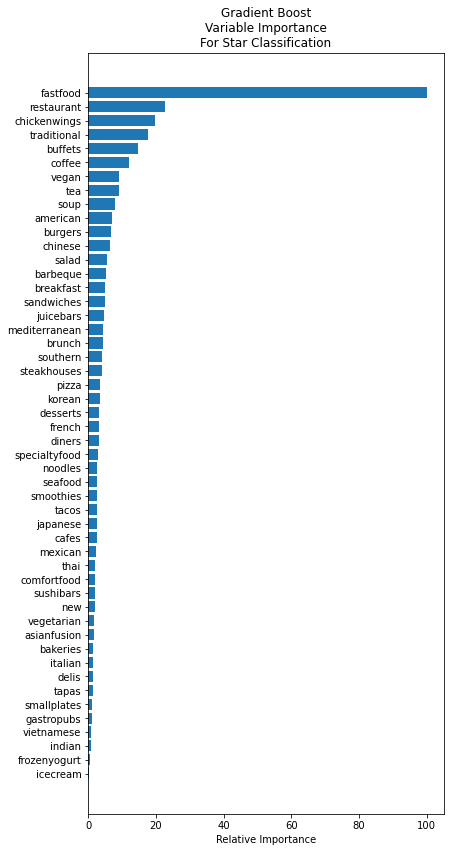

In [151]:
feature_importance = gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize = (14,14))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boost\nVariable Importance\nFor Star Classification')
plt.show()